# Heart Attack - Regression

Source: https://www.kaggle.com/datasets/sukhmandeepsinghbrar/heart-attack-dataset?resource=download

- The heart attack datasets were collected at Zheen hospital in Erbil, Iraq, from January 2019 to May 2019. 

- The attributes of this dataset are: age, gender, heart rate, systolic blood pressure, diastolic blood pressure, blood sugar, ck-mb and troponin with negative or positive output. 

- According to the provided information, the medical dataset classifies either heart attack or none. 

- The gender column in the data is normalized: 

    - the male is set to 1 and the female to 0. 
    
    - The glucose column is set to 1 if it is > 120; otherwise, 0. 
    
    - As for the output, positive is set to 1 and negative to 0.

--- 

# Step 1: Import Data and Packages

In [63]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("Medicaldataset.csv")

data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


### Check columns

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


### Train-Test Split

In [65]:
# import package
from sklearn.model_selection import train_test_split

data = data.drop("Result", axis=1)

# declare our X inputs and y outcomes
X = data.drop("Age", axis=1)
y = data["Age"]


# stratify split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

X_train.shape =  (1055, 7)
X_test.shape =  (264, 7)
y_train.shape =  (1055,)
y_test.shape =  (264,)


### Check the training set

In [66]:
# combine the X_train and y_train into a dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# check records and features
print(training_set.shape)

(1055, 8)


### Check for missing data

In [67]:
# Check for any missing values
print(training_set.isnull().values.any())

# Check number of missing values
print("Count of na's:", training_set.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", training_set.isna().any(axis=1).sum())

False
Count of na's: 0
Cases with missing values: 0


--- 

# Step 2: Exploratory Data Analysis


In [68]:
# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Correlation Matrix Heatmap

<AxesSubplot:>

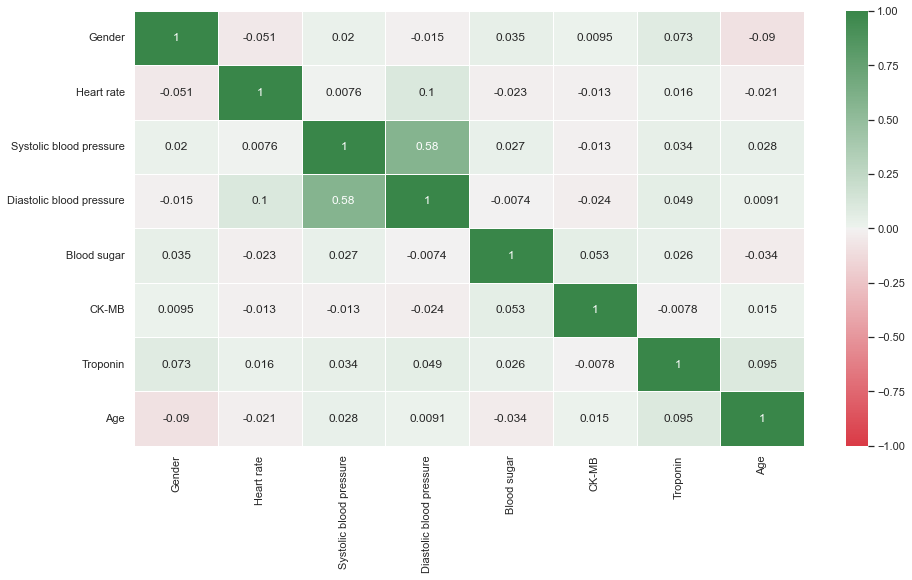

In [51]:
# calculate the correlation matrix
corr_matrix = training_set.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

### Distributions

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Heart rate'}>,
        <AxesSubplot:title={'center':'Systolic blood pressure'}>],
       [<AxesSubplot:title={'center':'Diastolic blood pressure'}>,
        <AxesSubplot:title={'center':'Blood sugar'}>,
        <AxesSubplot:title={'center':'CK-MB'}>],
       [<AxesSubplot:title={'center':'Troponin'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

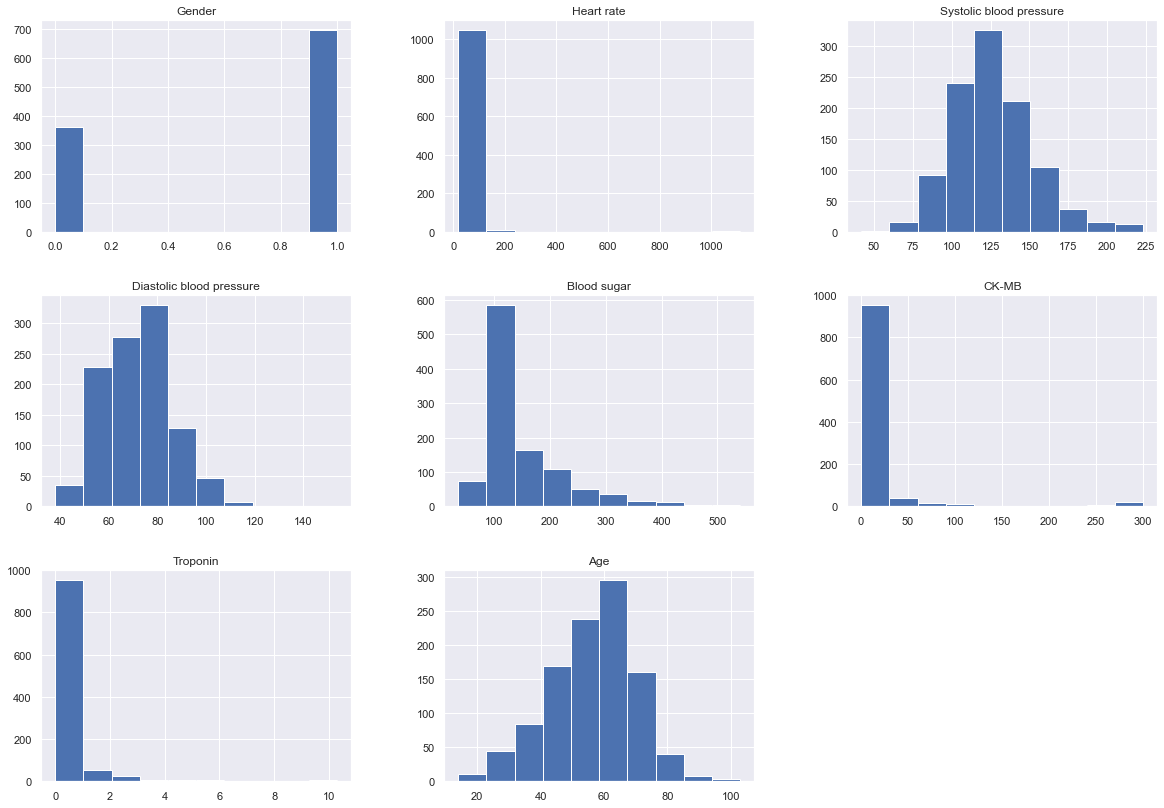

In [52]:
training_set.hist(figsize=(20,14))

### Pairplot

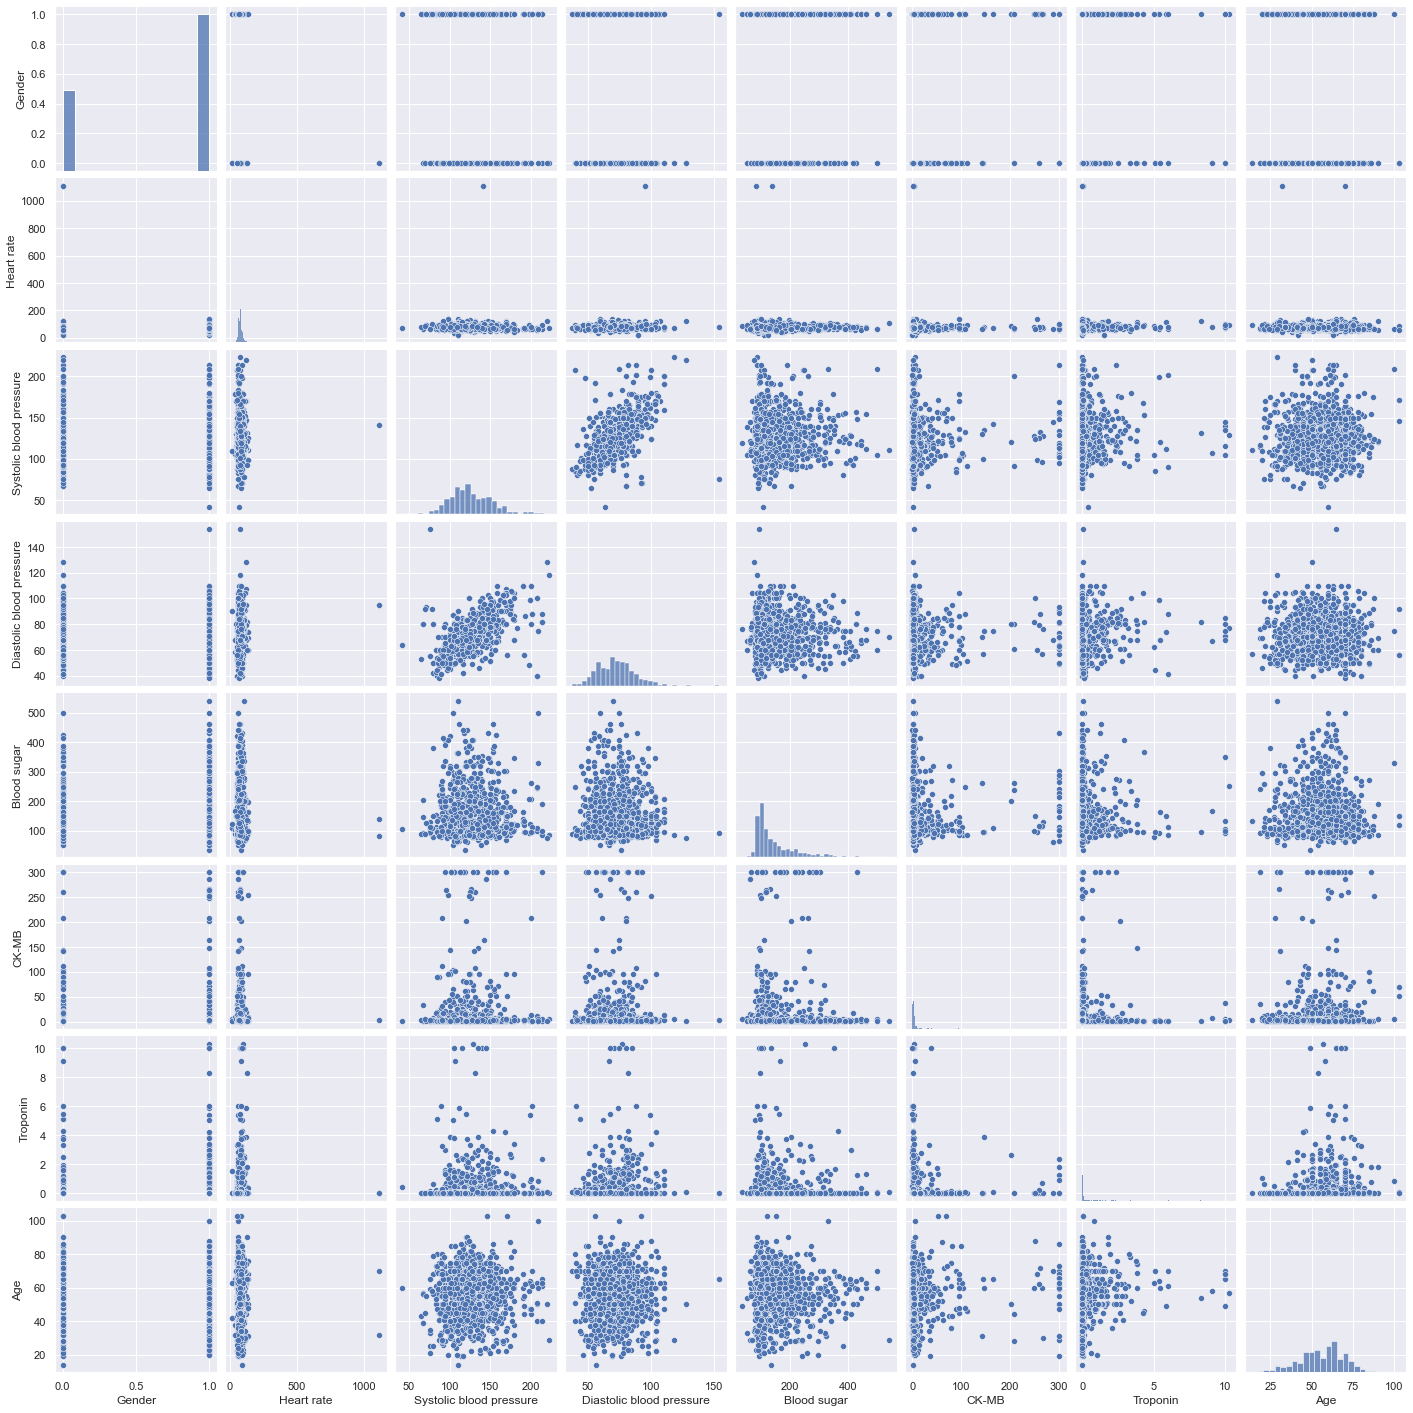

In [53]:
sns.pairplot(training_set)

---

# Step 3: Prepare the Data

### One-Hot Encode Categorical Features

(none)

### Check which features are continuous

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 598 to 1126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1055 non-null   int64  
 1   Heart rate                1055 non-null   int64  
 2   Systolic blood pressure   1055 non-null   int64  
 3   Diastolic blood pressure  1055 non-null   int64  
 4   Blood sugar               1055 non-null   float64
 5   CK-MB                     1055 non-null   float64
 6   Troponin                  1055 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 65.9 KB


### Feature Scaling on Continuous Features with Standardization

In [69]:
# import scaling & column transformer
from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer

# Create a function to scale the train and test sets

def scaleCategoricalFeatures(X_data):
    

    # Select features to scale
    features = ["Heart rate", "Systolic blood pressure",
               "Diastolic blood pressure", "CK-MB", "Blood sugar", "Troponin"]
    
    scaler = StandardScaler()

    X_data[features] = scaler.fit_transform(X_data[features])
    
    return X_data

X_train = scaleCategoricalFeatures(X_train)
X_test = scaleCategoricalFeatures(X_test)

print(X_train.shape)

(1055, 7)


### Make sure it worked by seeing if Standard Deviations are 1

In [70]:
X_train.describe()

,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1055.000000,1.055000e+03,1.055000e+03,1.055000e+03,1.055000e+03,1.055000e+03,1.055000e+03
mean,0.658768,-3.825271e-17,2.904470e-17,-3.401176e-16,-1.944798e-16,-1.483805e-17,1.778462e-17
std,0.474348,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00
min,0.000000,-1.224322e+00,-3.295463e+00,-2.429277e+00,-1.485151e+00,-3.203558e-01,-3.118444e-01
25%,0.000000,-2.982049e-01,-6.565325e-01,-7.658458e-01,-6.515080e-01,-2.931233e-01,-3.073246e-01
50%,1.000000,-6.667564e-02,-1.132232e-01,-2.261072e-02,-4.133244e-01,-2.689906e-01,-3.000930e-01
75%,1.000000,1.543296e-01,6.241252e-01,6.144479e-01,3.541560e-01,-2.076187e-01,-2.332004e-01
max,1.000000,2.173917e+01,3.728750e+00,5.781701e+00,5.210455e+00,5.914180e+00,8.997976e+00


In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 598 to 1126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1055 non-null   int64  
 1   Heart rate                1055 non-null   float64
 2   Systolic blood pressure   1055 non-null   float64
 3   Diastolic blood pressure  1055 non-null   float64
 4   Blood sugar               1055 non-null   float64
 5   CK-MB                     1055 non-null   float64
 6   Troponin                  1055 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 65.9 KB


In [72]:
X_train.head()

,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
598,1,0.101709,1.012203,1.322291,-0.651508,-0.213444,-0.310036
1213,1,1.175163,-0.617725,-0.234964,-0.730903,-0.277728,-0.284726
209,1,-0.214012,-3.295463,-0.588885,-0.545649,-0.308747,0.072336
538,0,0.227998,0.119624,0.543664,0.446783,-0.286466,-0.294669
140,0,0.017517,-1.549112,-1.792218,-0.863227,-0.277520,-0.310036


---

# Step 4: Linear Regression


### Full Model

In [73]:
# select predictor variables and outcome variable for the model ---

X = X_train

y = y_train


# # To create and test interaction terms 

# X['Interaction_term'] = data['predictor_var'] * data['predictor_var2']


# build model ---------------------------------------

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# require a constant in the model summary
X = sm.add_constant(X)

# build the model and fit it to the data
linear_model = sm.OLS(y, X, hasconst=True)
linear_model = linear_model.fit()


print(linear_model.summary())

# NOTE: P-values are the probability the results are insignificant
# and due to random chance. 
# With Values lower than the alpha level (0.05), we can reject the null hypothesis

# NOTE: R-squared is the amount of variability within the outcome variable
# that is explained by our model

# NOTE: Interpreting coefficients
# If we hold all other features fixed, a one unit increase 
# in the predictor_variable is correlated with 
# an increase of (coefficient_number) for the outcome_variable

# Prob (F-statistic) = P-value of the model

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.298
Date:                Sun, 28 Apr 2024   Prob (F-statistic):            0.00178
Time:                        09:33:41   Log-Likelihood:                -4239.3
No. Observations:                1055   AIC:                             8495.
Df Residuals:                    1047   BIC:                             8534.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Backwards Elimination: Refit model with features of below 0.05 p-value

In [74]:
# select predictor variables and outcome variable for the model ---

features = ["Gender", "Troponin"]

X = X_train[features]

y = y_train

# require a constant in the model summary
X = sm.add_constant(X)

# build the model and fit it to the data
linear_model = sm.OLS(y, X, hasconst=True)
linear_model = linear_model.fit()


print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.851
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           5.77e-05
Time:                        09:34:52   Log-Likelihood:                -4241.0
No. Observations:                1055   AIC:                             8488.
Df Residuals:                    1052   BIC:                             8503.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9239      0.713     81.292      0.0

---

# Step 5: Ridge Regression
    
### GridSearchCV - Ridge

### Optimized Ridge Model

### GridSearchCV - Lasso

### Optimized Lasso Model

--- 
# Test Set Accuracy

---

# Final Conclusion
